`Story`

You have just studied all the major data science Algortihms,you realise that For building any machine learning model, it is important to have a sufficient amount of data to train the model. The data is often collected from various resources and might be available in different formats. Due to this reason, data cleaning and preprocessing become a crucial step in the machine learning project.

Whenever new data points are added to the existing data, we need to perform the same preprocessing steps again before we can use the machine learning model to make predictions. This becomes a tedious and time-consuming process!

An alternate to this is creating a machine learning pipeline that remembers the complete set of preprocessing steps in the exact same order. So that whenever any new data point is introduced, the machine learning pipeline performs the steps as defined and uses the machine learning model to predict the target variable.


Generally, a machine learning pipeline describes or models your ML process: writing code, releasing it to production, performing data extractions, creating training models, and tuning the algorithm. An ML pipeline should be a continuous process as a team works on their ML platform.

Machine learning programs involve a series of steps to get the data ready before feeding it into the ML model. Those steps can include:

- Reading the data and converting it to a Pandas dataframe
- Dropping or adding some columns
- Running some calculations over the columns
- Normalizing the data

We can use the Pipeline object to do this one step after another.


To build a machine learning pipeline, the first requirement is to define the structure of the pipeline. In other words, we must list down the exact steps which would go into our machine learning pipeline.

In order to do so, we will build a prototype machine learning model on the existing data before we create a pipeline. The main idea behind building a prototype is to understand the data and necessary preprocessing steps required before the model building process. Based on our learning from the prototype model, we will design a machine learning pipeline that covers all the essential preprocessing steps.

The focus of this section will be on building a prototype that will help us in defining the actual machine learning pipeline for our sales prediction project. Let’s get started!

# AIM:
Predicting House Sales in King County, USA 

First, you import the necessary packages for plotly, numpy,pandas, matplotlib and seaborn.

In [1]:
import numpy as np 
import pandas as pd

# plotly
import plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# seaborn
import seaborn as sns

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Get the Data

Now, you use `read_csv` to load the csv file into a dataframe

In [2]:
kc = pd.read_csv('kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


Check the column names now

In [3]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

`Interpretation:` We see that our dataset has a lot of features


Now, you check the `shape` of dataframe to analyse the number of rows and columns

In [4]:
kc.shape

(21613, 21)

`Interpretation`: This is a huge dataset with more than 20,000 rows and 21 columns.

Now, let's check the basics of the dataframe using `info`

In [5]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

`Interpretation`: We see that we have all types of data in our dataset.

Now, you decide to visualise the Houses in USA based on their zip codes.
You know that for that you use `sns.scatterplot`, taking the zipcode as hue.

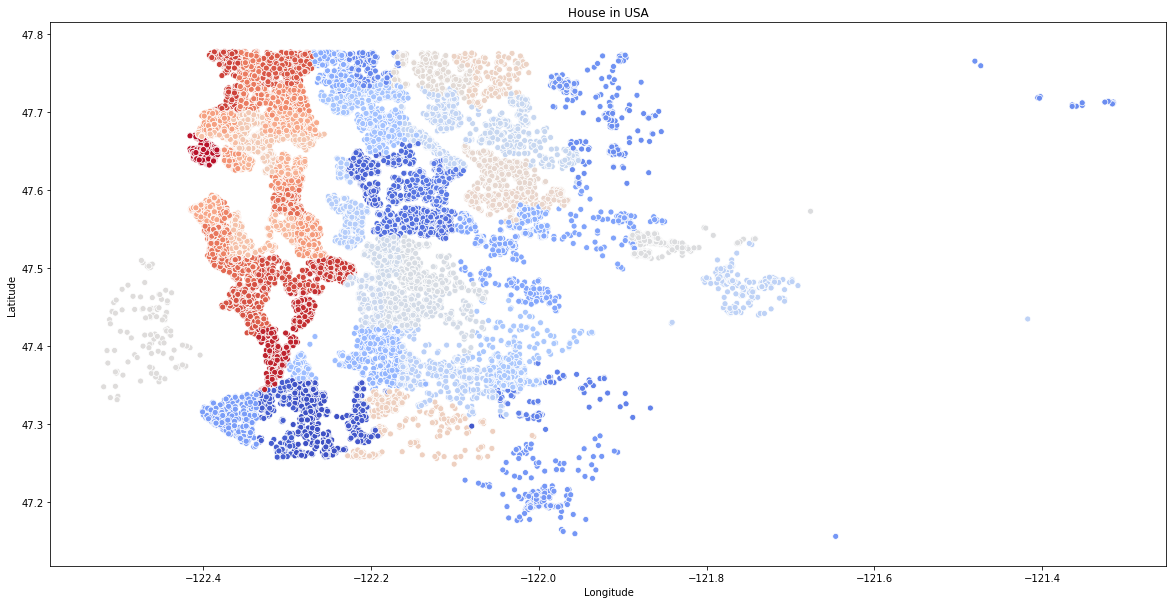

In [6]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='long', y='lat', data=kc,
                hue="zipcode", 
                legend=False, 
                palette=sns.color_palette('coolwarm', n_colors=len(kc.zipcode.unique())));

plt.title('House in USA')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

`Interpretation`: We see how we have visualised the House Data using zipcode


Now, you decide to create a histogram from the entire dataframe, so you use `kc.hist()` to visualise each and every feature and their relation with the pricings.

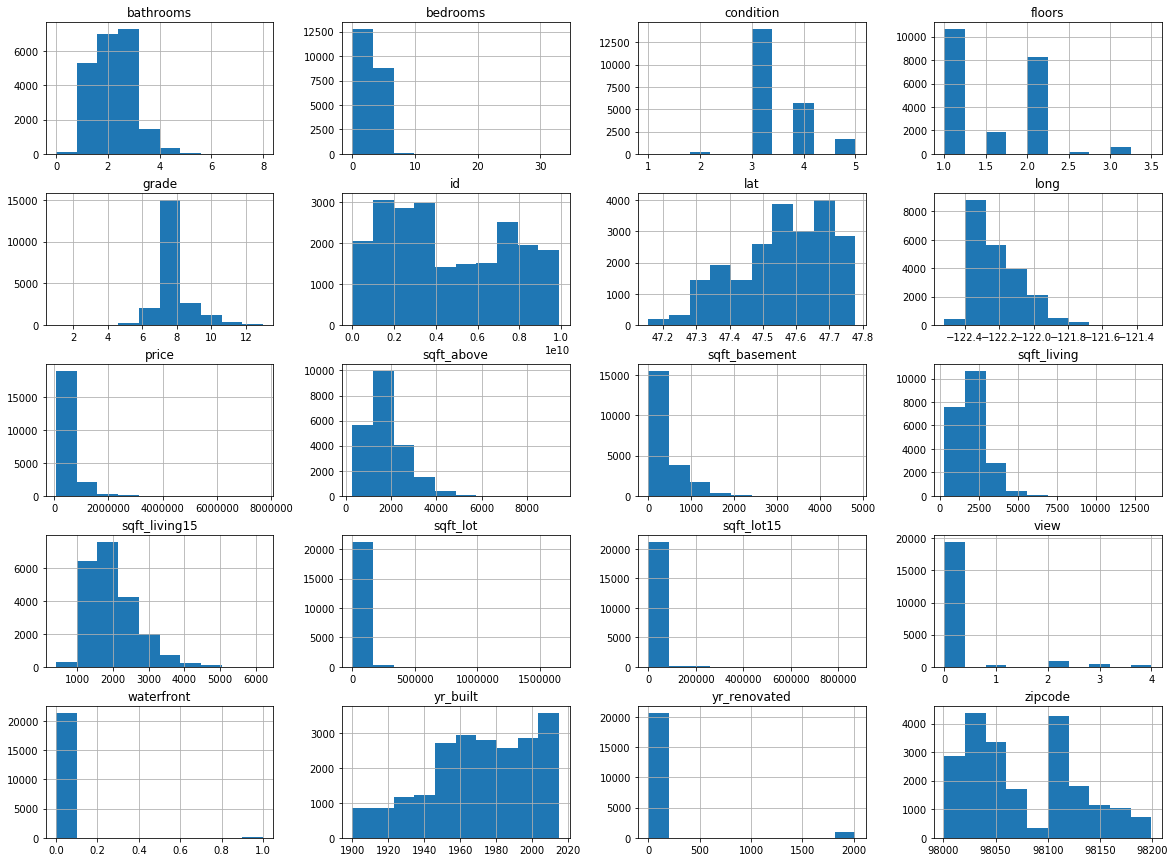

In [7]:
kc.hist(bins=10, figsize=(20,15));

`Interpretation`: We now have a rough idea of how the features affect pricings.

Now, you check for the number of unique pincodes in the dataframe.

In [8]:
kc.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

`Interpretation`: The result is as expected, since it is the US dataset.

Now, you check for the list of years the houses were renovated.

In [9]:
kc.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

`Interpretation`: We have the info of the years as well.

No, you use `describe()` to check the data, and you want the answer in integer  types, so you use `astype(int64)` as well.

In [10]:
kc.describe().T.astype('int64')

,count,mean,std,min,25%,50%,75%,max
id,21613,4580301520,2876565571,1000102,2123049194,3904930410,7308900445,9900000190
price,21613,540088,367127,75000,321950,450000,645000,7700000
bedrooms,21613,3,0,0,3,3,4,33
bathrooms,21613,2,0,0,1,2,2,8
sqft_living,21613,2079,918,290,1427,1910,2550,13540
sqft_lot,21613,15106,41420,520,5040,7618,10688,1651359
floors,21613,1,0,1,1,1,2,3
waterfront,21613,0,0,0,0,0,0,1
view,21613,0,0,0,0,0,0,4
condition,21613,3,0,1,3,3,4,5


`Interpretation`: We see how our dataset is distributed.

Now, we create a test set and split our data.
We normally do this immediately before we have to create our model, but this time, let's split the data first and then analyse it further.

# Create a Test Set

Here, we will use `Stratified shuffle`, which split gives the index set of splited data in train/test sets. 
The frequency of each class in each fold have a same ratio with the ration of each class in all dataset.

StratifiedShuffleSplit is a variation of ShuffleSplit. First, StratifiedShuffleSplit shuffles your data, and then it also splits the data into n_splits parts. However, it’s not done yet. After this step, StratifiedShuffleSplit picks one part to use as a test set. Then it repeats the same process n_splits -1 other times, to get n_splits -1 other test sets

So, the difference here is that StratifiedKFold just shuffles and splits once, therefore the test sets do not overlap, while StratifiedShuffleSplit shuffles each time before splitting, and it splits n_splits times, the test sets can overlap.

In [11]:
#(kc['zipcode'].value_counts() / len(kc))[:10]

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified shuffle split gives the index set of splited data in train/test sets. 
# The frequency of each class in each fold have a same ratio with the ration of each class in all dataset.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(kc, kc["zipcode"]):
    strat_train_set = kc.loc[train_index]
    strat_test_set = kc.loc[test_index]

`Interpretation`: Our data has been split into train and test sets.

Let's verify it

In [13]:
strat_train_set.shape

(16209, 21)

In [14]:
strat_test_set.shape

(5404, 21)

In [15]:
strat_test_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9040,1180007005,20140625T000000,265950.0,3,1.50,1150,8450,1.0,0,0,...,6,1150.0,0,1951,0,98178,47.4927,-122.224,1160,6800
479,6665800030,20140718T000000,590000.0,4,2.75,2910,10650,1.0,0,2,...,8,1780.0,1130,1975,0,98033,47.6658,-122.188,2920,10988
14254,2425049107,20150305T000000,1950000.0,4,3.75,4150,17424,1.0,0,0,...,9,3130.0,1020,1963,2000,98039,47.6390,-122.236,3930,21420
11159,1321700030,20140624T000000,575000.0,4,2.50,4620,20793,2.0,0,0,...,11,4620.0,0,1991,0,98023,47.2929,-122.342,3640,20793
12072,1861400116,20150116T000000,605000.0,3,3.25,2200,2400,2.0,0,0,...,8,1740.0,460,1988,0,98119,47.6325,-122.371,2200,3600


Now, let's drop the unnecesarry columns from our test and train sets.
You decide to drop zipcode, id, and the sqft deatiling columns since they would not be contributing much to the pricing.

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("zipcode", axis=1, inplace=True)
    set_.drop("id", axis=1, inplace=True)
#     set_.drop("sqft_living", axis=1, inplace=True)
    set_.drop("sqft_lot", axis=1, inplace=True)
    set_.drop("sqft_above", axis=1, inplace=True)
#     set_.drop("sqft_basement", axis=1, inplace=True)
    set_.drop("sqft_living15", axis=1, inplace=True)
    set_.drop("sqft_lot15", axis=1, inplace=True)
#     set_.drop("yr_renovated", axis=1, inplace=True)
    set_.drop("date", axis=1, inplace=True)

`Interpretation`: The columns have been dropped.

## Discover and Visualize the Data to Gain Insights

You copy the training set into another dataframe

In [17]:
housing = strat_train_set.copy()

Now, create a correlation matrix and check how much each attribute correlates with the house value:

In [18]:
corr_matrix = housing.corr()

In [19]:
# how much each attribute correlates with the house value:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701650
grade            0.670036
bathrooms        0.529208
view             0.404349
sqft_basement    0.325724
lat              0.305636
bedrooms         0.304607
waterfront       0.263209
floors           0.258562
yr_renovated     0.125711
yr_built         0.058305
condition        0.035988
long             0.017655
Name: price, dtype: float64

You now decide to check the relations through visualisations for the attributes ["price", "grade", "bathrooms", "bedrooms", "floors" ]

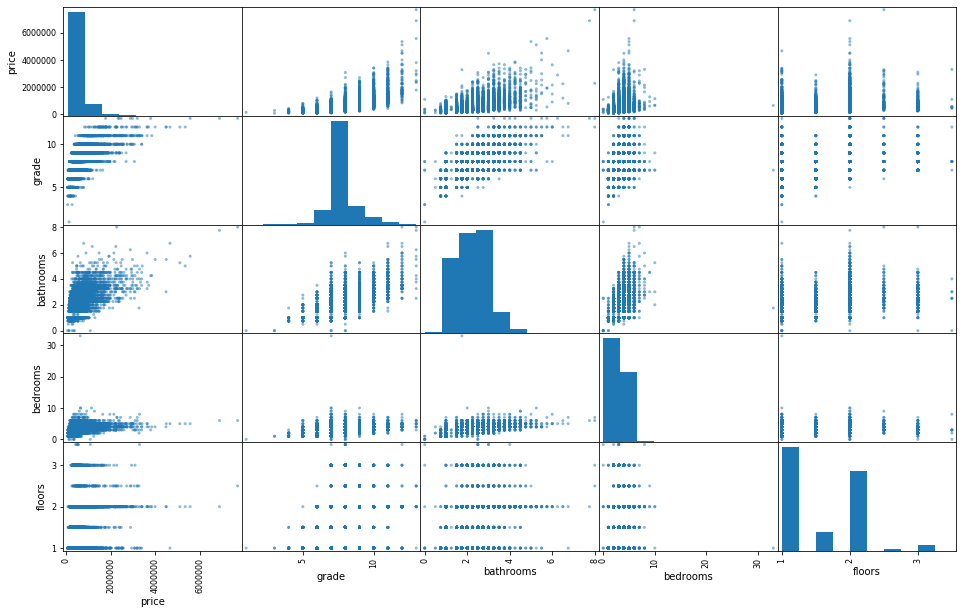

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["price", "grade", "bathrooms", "bedrooms", "floors" ]
scatter_matrix(housing[attributes], figsize=(16, 10));

`Interpretation`: Based on `waterfront` and `view` data, It seems like they don't affect the house value too much.  



# Data Wragling

Check the description of the test set

In [21]:
strat_test_set.describe().astype('int64')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
count,5404,5404,5404,5404,5404,5404,5404,5404,5404,5404,5404,5404,5404,5404
mean,539131,3,2,2082,1,0,0,3,7,288,1971,80,47,-122
std,361633,0,0,909,0,0,0,0,1,438,29,391,0,0
min,81000,0,0,384,1,0,0,1,3,0,1900,0,47,-122
25%,320000,3,1,1430,1,0,0,3,7,0,1952,0,47,-122
50%,451000,3,2,1920,1,0,0,3,7,0,1975,0,47,-122
75%,645000,4,2,2550,2,0,0,4,8,550,1997,0,47,-122
max,7062500,11,7,10040,3,1,4,5,13,3260,2015,2015,47,-121


Now, check the detailing of the train set using `info`

In [22]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16209 entries, 18696 to 15388
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16209 non-null  float64
 1   bedrooms       16209 non-null  int64  
 2   bathrooms      16209 non-null  float64
 3   sqft_living    16209 non-null  int64  
 4   floors         16209 non-null  float64
 5   waterfront     16209 non-null  int64  
 6   view           16209 non-null  int64  
 7   condition      16209 non-null  int64  
 8   grade          16209 non-null  int64  
 9   sqft_basement  16209 non-null  int64  
 10  yr_built       16209 non-null  int64  
 11  yr_renovated   16209 non-null  int64  
 12  lat            16209 non-null  float64
 13  long           16209 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 1.9 MB


Converting bathroom and floors to integer type

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.bathrooms = set_.bathrooms.astype('int64')
    set_.floors = set_.floors.astype('int64')

In [24]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16209 entries, 18696 to 15388
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16209 non-null  float64
 1   bedrooms       16209 non-null  int64  
 2   bathrooms      16209 non-null  int64  
 3   sqft_living    16209 non-null  int64  
 4   floors         16209 non-null  int64  
 5   waterfront     16209 non-null  int64  
 6   view           16209 non-null  int64  
 7   condition      16209 non-null  int64  
 8   grade          16209 non-null  int64  
 9   sqft_basement  16209 non-null  int64  
 10  yr_built       16209 non-null  int64  
 11  yr_renovated   16209 non-null  int64  
 12  lat            16209 non-null  float64
 13  long           16209 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.9 MB


# Prepare the Data for Pipelining

Now, it'e time to prepare the data for pipelining.

First, you drop the `price` column from the train set and copy it into another variable.

Then, you call the OneHotEncoder, and since you've done all this before, it's not new for you to encode categorical data.

In [25]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [27]:
view = housing.view.values

Encoding `view`, `grade` and `condition` features using `.fit_transform(view.reshape(-1,1))`

In [28]:
view_hot = encoder.fit_transform(view.reshape(-1,1))

In [29]:
view_hot

<16209x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16209 stored elements in Compressed Sparse Row format>

In [30]:
grade = housing.grade.values

In [31]:
grade_hot = encoder.fit_transform(grade.reshape(-1,1))
grade_hot

<16209x12 sparse matrix of type '<class 'numpy.float64'>'
	with 16209 stored elements in Compressed Sparse Row format>

In [32]:
condition = housing.condition.values

In [33]:
condition_hot = encoder.fit_transform(condition.reshape(-1, 1))
condition_hot

<16209x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16209 stored elements in Compressed Sparse Row format>

# Transformation Pipelines

Now that everything is ready, we build the pipeline.

In [34]:
from sklearn.pipeline import Pipeline



BaseEstimator provides among other things a default implementation for the get_params and set_params methods. This is useful to make the model grid search-able with GridSearchCV for automated parameters tuning and behave well with others when combined in a Pipeline.


For transformers, you have to define the methods .fit(self, X, y=None) and .transform(self, X). There is a class, TransformerMixin, that doesn’t do much besides add a .fit_transform method that calls .fit and .transform, but it’s still nice to inherit from it in order to document that you’re intending to make your code work well with scikit-learn.


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names, include=True):
        self.attribute_names = attribute_names
        self.include = include
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.include:
            return X[self.attribute_names].values
        else:
            return X.drop(self.attribute_names, axis=1).values

`Interpretation`: Building pipelines for the encoded features

In [36]:
view_pipeline = Pipeline([
        ('selector_view', DataFrameSelector(["view"])),
        ('onehotencoder_view', OneHotEncoder())
 ])

In [37]:
grade_pipeline = Pipeline([
        ('selector_grade', DataFrameSelector(["grade"])),
        ('onehotencoder_grade', OneHotEncoder())
 ])

In [38]:
cond_pipeline = Pipeline([
        ('selector_cond', DataFrameSelector(["condition"])),
        ('onehotencoder_cond', OneHotEncoder())
 ])

In [39]:
rest_pipeline = Pipeline([
        ('selector_rest', DataFrameSelector(["view", "grade","condition"],include=False))
 ])

`Feature Union` Concatenates results of multiple transformer objects.

This estimator applies a list of transformer objects in parallel to the input data, then concatenates the results. This is useful to combine several feature extraction mechanisms into a single transformer.

Parameters of the transformers may be set using its name and the parameter name separated by a ‘__’. A transformer may be replaced entirely by setting the parameter with its name to another transformer, or removed by setting to ‘drop’.

In [40]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("rest_pipeline", rest_pipeline),
        ("view_pipeline", view_pipeline),
        ("grade_pipeline", grade_pipeline),
        ("cond_pipeline", cond_pipeline)
])

In [41]:
housing.shape

(16209, 13)

Applying pipeline to the housing_prepared

In [42]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16209x32 sparse matrix of type '<class 'numpy.float64'>'
	with 169210 stored elements in Compressed Sparse Row format>

In [43]:
housing_prepared.toarray().astype('int64')

array([[   4,    2, 2850, ...,    1,    0,    0],
       [   3,    1, 2120, ...,    0,    1,    0],
       [   4,    2, 1770, ...,    0,    0,    1],
       ...,
       [   3,    2, 3970, ...,    1,    0,    0],
       [   4,    2, 2110, ...,    0,    1,    0],
       [   3,    1, 1890, ...,    1,    0,    0]], dtype=int64)

# Select and Train a Model

We will use Linear Regression, Decision tree & Random Forest regression for our model evaluation.

Note that here we'll be using MSE.

In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() ##########

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [46]:
lin_rmse

192036.56717495265

In [47]:
lin_reg.score(housing_prepared, housing_labels)

0.7290700784743533

`Interpretation`: We see that the model has an accuracy of 70% right now, let's work on improving it using CV


But first, lets run the model as a Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() ##########

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

10108.581464282826

In [62]:
tree_reg.score(housing_prepared, housing_labels)

0.9992492946100432

`Interpretation`: We see that this gives us wildly accurate results.

Now, let's try with RandomForest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor() ###########

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [65]:
forest_reg.score(housing_prepared, housing_labels)

0.9811305330096934

In [51]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

50823.191146349665

`Interpretation`: Again, even this gives insanely accurate results.

Now, we will use GridSearch for Random Forest

## Fine-Tune Your Model

You know how to use gridSearchCV by now since you have done this enough times before

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,4,5,6,8,10], 'max_features': [2, 4, 6, 8]},
   # {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor() #########

grid = GridSearchCV(forest_reg, param_grid, cv=5)

grid.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 4, 5, 6, 8, 10]}])

In [73]:
grid.best_score_

0.8355485093388882

`Interpretation`: We see that GridSearch does not necessarily improve the model accuracy in every case

In [75]:
grid.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=10)

In [76]:
grid.best_params_

{'max_features': 8, 'n_estimators': 10}

In [77]:
cvres = grid.cv_results_

In [78]:
feature_importances = grid.best_estimator_.feature_importances_
feature_importances

array([2.31541581e-02, 8.32992658e-02, 2.90549235e-01, 5.33122591e-03,
       2.71529582e-02, 3.37762715e-02, 4.74201871e-02, 8.28914380e-03,
       1.56355032e-01, 6.76263965e-02, 4.99594174e-02, 2.94620007e-03,
       2.17251386e-03, 2.54010336e-03, 1.97470212e-02, 1.53963162e-06,
       1.53321875e-05, 3.11710533e-05, 7.82764170e-04, 7.14485810e-03,
       1.47214261e-02, 2.00797795e-02, 2.73492599e-02, 3.60752085e-02,
       2.49834719e-02, 1.92537293e-02, 1.45866943e-02, 3.37667441e-04,
       3.44582815e-04, 5.19041411e-03, 5.75661003e-03, 3.02636075e-03])

# Evaluate Your System on the Test Set

In [60]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [61]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 47,766.0
final_rmse

155083.42474918842

# Conclusion
- We have created pipelines and seen how drastically they improve model accuracy